<a href="https://colab.research.google.com/github/arifuddinatif/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [2]:
# mounting drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [84]:
# Importing the libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
%matplotlib inline
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [98]:
# reading data

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/CP-2 Supervised ML - Regression/dat files/Copy of SeoulBikeData.csv',encoding= 'unicode_escape')

#Overview of data

In [ ]:
# head of data

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# tail of data

df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# description of data

df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
# columns in our dataset

df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#Performing EDA

In [69]:
# checking for null values

df.isnull().sum()

Rented Bike Count          0
Hour                       0
Temperature(°C)            0
Humidity(%)                0
Wind speed (m/s)           0
Visibility (10m)           0
Solar Radiation (MJ/m2)    0
Holiday                    0
Functioning Day            0
month                      0
Winter                     0
Spring                     0
Autumn                     0
dtype: int64

Above result says that there are no null values in the data

In [72]:
# finding the type of data of 'Date' column

type(df['Date'][0])

str

In [99]:
# converting string format of 'Date' column into date-time format

df['Date'] = pd.to_datetime(df['Date'])

In [74]:
# all the seasons present in data

df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [100]:
# creating a column containing the year from a particular date

year = []
for i in range(len(df['Date'])):
  year.append(df['Date'][i].year)
df['year'] = year  

In [101]:
# creating a column containing the month number from a particular date

months = []
for i in range(len(df['Date'])):
  months.append(df['Date'][i].month)
df['month'] = months  

In [89]:
# creating a dataframe containing the sum of all column values pertaining to differant seasons

df_s = df.groupby('Seasons').sum()

In [78]:
df_s

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),year,month
Seasons,,,,,,,,,,,,
Autumn,1790002,25116,30839.9,129355,3264.5,3408683,12009.2,1139.65,268.1,123.0,4407312,18816
Spring,1611909,25392,28807.1,129779,4139.1,2738725,9097.1,1520.84,403.8,0.0,4455744,10992
Summer,2283234,25392,58694.8,143479,3553.6,3315854,41400.3,1680.85,559.7,0.0,4455744,15048
Winter,487169,24840,-5487.4,107449,4153.0,3123332,-26820.0,644.07,70.9,534.6,4358136,12312


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f984ee832d0>],
      dtype=object)

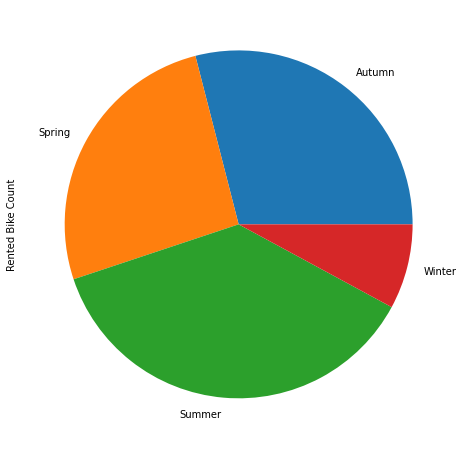

In [79]:
# creating a pie chart of bike count in differant seasons

df_s['Rented Bike Count'].plot(kind='pie', subplots=True, figsize=(8, 8))

conclusions from above pie chart:
1. most bikes have been rented in the summer season.
2. least bike rent count is in winter season.
3. autumn and spring seasons have almost equal amounts of bike rent count.

In [80]:
# creating a dataframe which contains rented bike counts in each seasaon

df_seasons = df.groupby('Seasons').sum()['Rented Bike Count']

In [81]:
df_seasons.head()

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64

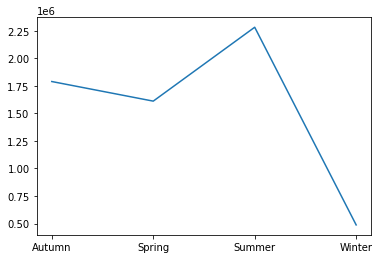

In [ ]:
# Line plot showing the differance in rent rate in differant seasons 

plt.plot(df_seasons)
plt.show()

In [ ]:
# creating a series which shows total number of bikes rented in each year

df_year = df.groupby('year').sum()['Rented Bike Count']

In [ ]:
df_year

year
2017     185330
2018    5986984
Name: Rented Bike Count, dtype: int64

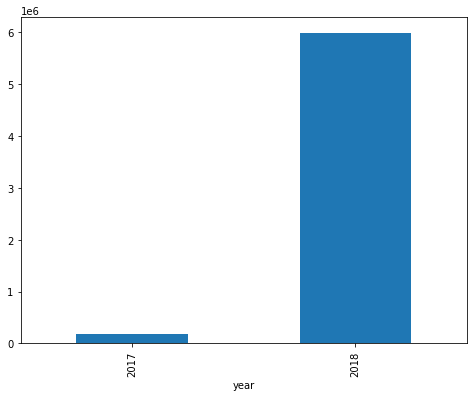

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
df_year.plot(kind='bar', ax=ax)

Above plot shows that most of the bikes have been rented in the year 2018.

In [ ]:
# creating a series which shows total number of bikes rented on the type of day

df_hol = df.groupby('Holiday').sum()['Rented Bike Count']

In [ ]:
df_hol

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64

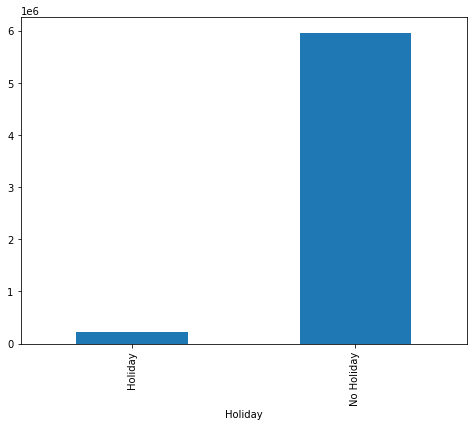

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
df_hol.plot(kind='bar', ax=ax)

Above plot shows that most of the bikes have been rented on working days.

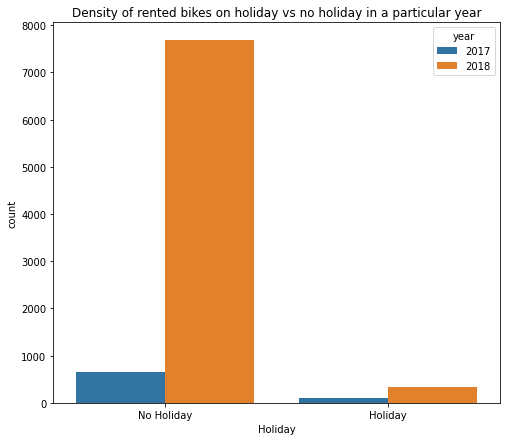

In [ ]:
# bikes rented on type of day in each year

plt.figure(figsize=(8,7))
sns.countplot(x='Holiday', hue = 'year', data= df)
plt.title('Density of rented bikes on holiday vs no holiday in a particular year')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


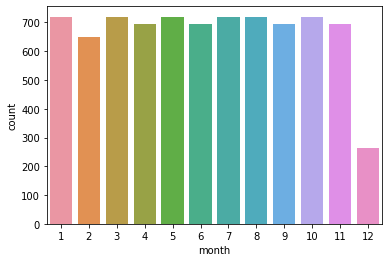

In [ ]:
# plot showing the bikes rented in differant months in the year 2018

sns.countplot(df.loc[df['year']==2018,'month'])

Above plot shows that very less bikes have been rented in december which is winter season.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


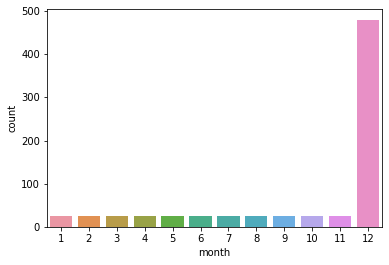

In [ ]:
# plot showing the bikes rented in differant months in the year 2017

sns.countplot(df.loc[df['year']==2017,'month'])

Above plot shows that most bikes have been rented in december in the year 2017 as we dont have data before that. 

In [ ]:
# creating a dataframe containing the count of bikes rented in differant intensities of rainfall

df_rain = pd.DataFrame(df.groupby('Rainfall(mm)')['Rented Bike Count'].sum())

In [ ]:
# resetting index of the dataframe

df_rain.reset_index(inplace=True)

In [ ]:
df_rain.head()

,Rainfall(mm),Rented Bike Count
0,0.0,6086009
1,0.1,15179
2,0.2,3706
3,0.3,1401
4,0.4,2147


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


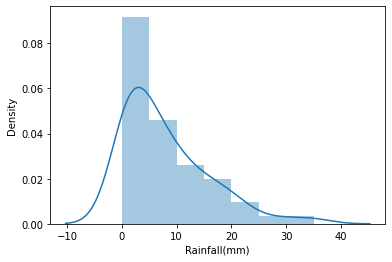

In [ ]:
# plot showing distribution of bike rentals according to rainfall intensity

sns.distplot(df_rain['Rainfall(mm)'])

Above plot shows that people tend to rent bikes when there is no or less rainfall.

In [ ]:
# creating a dataframe containing the count of bikes rented in differant intensities of snowfall

df_snow = pd.DataFrame(df.groupby('Snowfall (cm)')['Rented Bike Count'].sum())

In [ ]:
df_snow.reset_index(inplace=True)

In [ ]:
df_snow.head()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


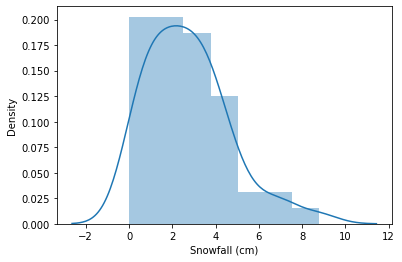

In [ ]:
# plot showing distribution of bike rentals according to snowfall intensity

sns.distplot(df_snow['Snowfall (cm)'])

Above plot shows that people tend to rent bikes when there is no or less snowfall.

In [ ]:
# creating a dataframe containing the count of bikes rented in differant intensities of rainfall

df_temp = pd.DataFrame(df.groupby('Temperature(°C)')['Rented Bike Count'].sum())
df_temp.reset_index(inplace=True)

In [ ]:
df_temp.head()

,Temperature(°C),Rented Bike Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


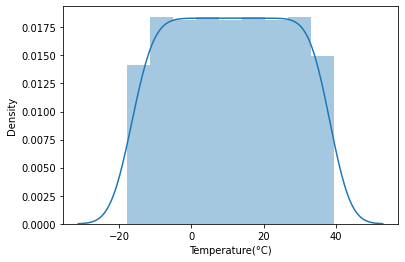

In [ ]:
# plot showing distribution of bike rentals according to temperature intensity

sns.distplot(df_temp['Temperature(°C)'])

Above plot shows that people tend to rent bikes when the temperature is between -5 to 25 degrees.

In [ ]:
# creating a dataframe containing the count of bikes rented in differant visibility ranges

df_visi = pd.DataFrame(df.groupby('Visibility (10m)')['Rented Bike Count'].sum())
df_visi.reset_index(inplace=True)

In [ ]:
df_visi.head()

,Visibility (10m),Rented Bike Count
0,27,83
1,33,33
2,34,24
3,38,98
4,53,65


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


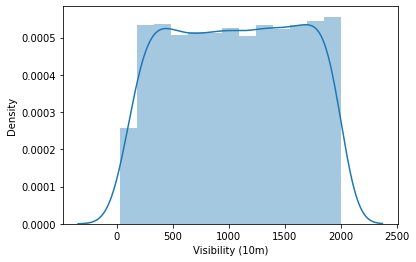

In [ ]:
sns.distplot(df_visi['Visibility (10m)'])

Above plot shows that people tend to rent bikes when the visibility is between 300 to 1700.

#Preprocessing the data

In [102]:
# encoding the season names

df['Winter'] = np.where(df['Seasons']=='Winter', 1, 0)
df['Spring'] = np.where(df['Seasons']=='Spring', 1, 0)
df['Summer'] = np.where(df['Seasons']=='Summer', 1, 0)
df['Autumn'] = np.where(df['Seasons']=='Autumn', 1, 0)

df.drop(columns=['Seasons'],axis=1,inplace=True)

In [103]:
# encoding 'Holiday' column with 0 and 1

for i in range(len(df['Holiday'])):
  if df['Holiday'][i] == 'No Holiday':
    df['Holiday'][i] = 0
  else:
    df['Holiday'][i] = 1  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [104]:
# encoding 'Functioning Day' column with 0 and 1

for i in range(len(df['Functioning Day'])):
  if df['Functioning Day'][i] == 'Yes':
    df['Functioning Day'][i] = 1
  else:
    df['Functioning Day'][i] = 0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,year,month,Winter,Spring,Summer,Autumn
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,2017,1,1,0,0,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,2017,1,1,0,0,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,2017,1,1,0,0,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,2017,1,1,0,0,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,2017,1,1,0,0,0


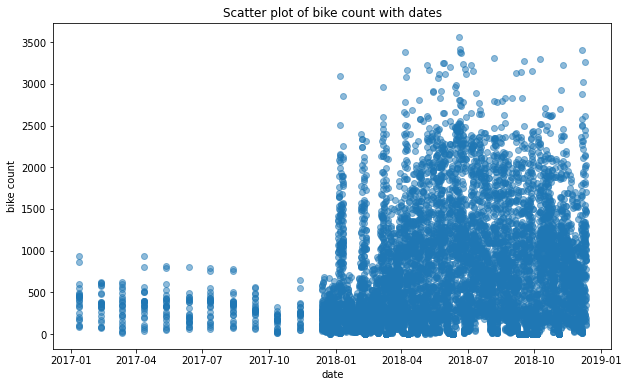

In [ ]:
# scatter plot of bike count on differant dates

plt.figure(figsize=(10,6))
plt.scatter(df['Date'], df['Rented Bike Count'], alpha=0.5)
plt.title('Scatter plot of bike count with dates')
plt.xlabel('date')
plt.ylabel('bike count')
plt.show()

Its evident from above plot that rentals increased in year 2018

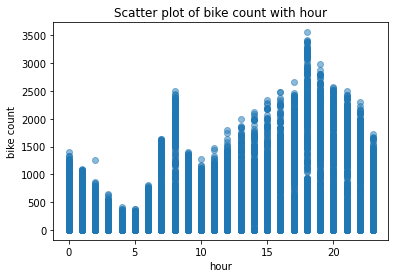

In [ ]:
# scatter plot of bike count at hour of a particular day

plt.scatter(df['Hour'], df['Rented Bike Count'], alpha=0.5)
plt.title('Scatter plot of bike count with hour')
plt.xlabel('hour')
plt.ylabel('bike count')
plt.show()

From above its clear that the rentals were more in the morning and evening.This is because people not having personal vehicle, commuting to offices and schools tend to rent bikes.

In [105]:
# finding the inter-quartile range 

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rented Bike Count             874.25
Hour                           11.50
Temperature(°C)                19.00
Humidity(%)                    32.00
Wind speed (m/s)                1.40
Visibility (10m)             1060.00
Dew point temperature(°C)      19.50
Solar Radiation (MJ/m2)         0.93
Rainfall(mm)                    0.00
Snowfall (cm)                   0.00
year                            0.00
month                           6.00
Winter                          0.00
Spring                          1.00
Summer                          1.00
Autumn                          0.00
dtype: float64


In [106]:
# listing features to remove outliers

features = list(df.columns)
features = features[2:]
list_0 = ['Hour','Winter','Spring','Summer','Autumn','Holiday','Functioning Day','month','year']
new_features = [x for x in features if x not in list_0]

In [107]:
new_features 

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [108]:
# removing outliers

df[new_features] = df[new_features][~((df[new_features] < (Q1 - 1.5 * IQR)) |(df[new_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            7078 non-null   float64       
 4   Humidity(%)                7078 non-null   float64       
 5   Wind speed (m/s)           7078 non-null   float64       
 6   Visibility (10m)           7078 non-null   float64       
 7   Dew point temperature(°C)  7078 non-null   float64       
 8   Solar Radiation (MJ/m2)    7078 non-null   float64       
 9   Rainfall(mm)               7078 non-null   float64       
 10  Snowfall (cm)              7078 non-null   float64       
 11  Holiday                    8760 non-null   object        
 12  Functi

In [110]:
# filling null values with mean values

df['Temperature(°C)'] = df['Temperature(°C)'].fillna(df['Temperature(°C)'].mean())
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].mean())
df['Wind speed (m/s)'] = df['Wind speed (m/s)'].fillna(df['Wind speed (m/s)'].mean())
df['Visibility (10m)'] = df['Visibility (10m)'].fillna(df['Visibility (10m)'].mean())
df['Dew point temperature(°C)'] = df['Dew point temperature(°C)'].fillna(df['Dew point temperature(°C)'].mean())
df['Solar Radiation (MJ/m2)'] = df['Solar Radiation (MJ/m2)'].fillna(df['Solar Radiation (MJ/m2)'].mean())
df['Rainfall(mm)'] = df['Rainfall(mm)'].fillna(df['Rainfall(mm)'].mean())
df['Snowfall (cm)'] = df['Snowfall (cm)'].fillna(df['Snowfall (cm)'].mean())

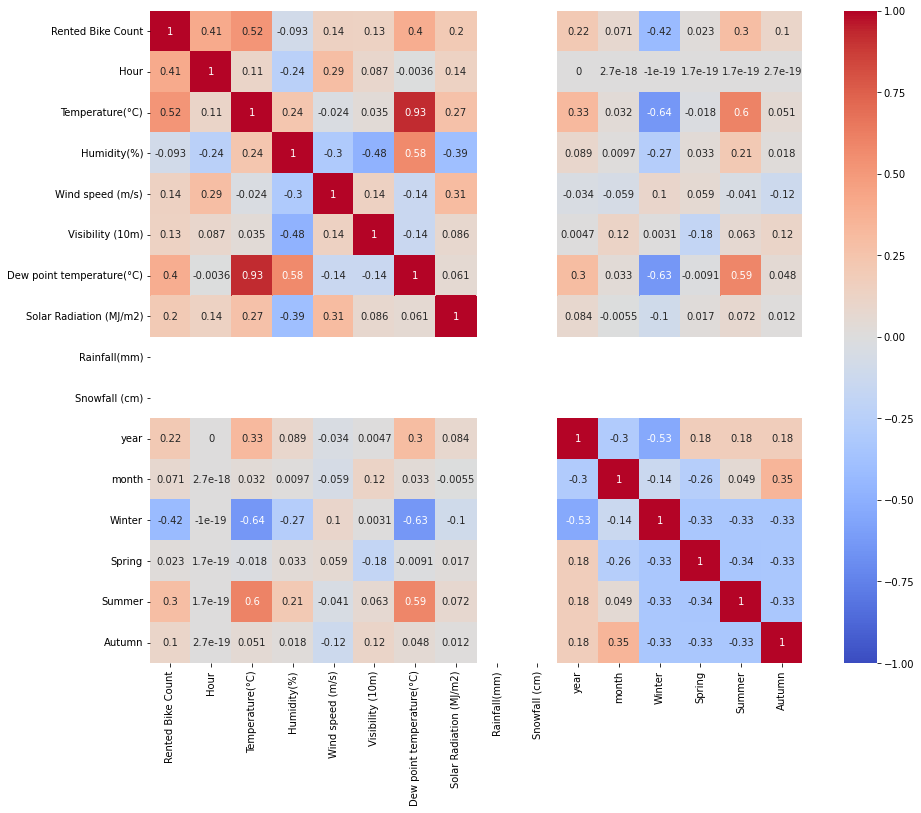

In [111]:
# extracting correlation heatmap

plt.figure(figsize=(15,12))
sns.heatmap(df.corr('pearson'),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

In [112]:
# dropping columns with more (or less) correlation

df.drop(columns=['Dew point temperature(°C)','Date','Rainfall(mm)','Snowfall (cm)','year'],axis=1,inplace=True)

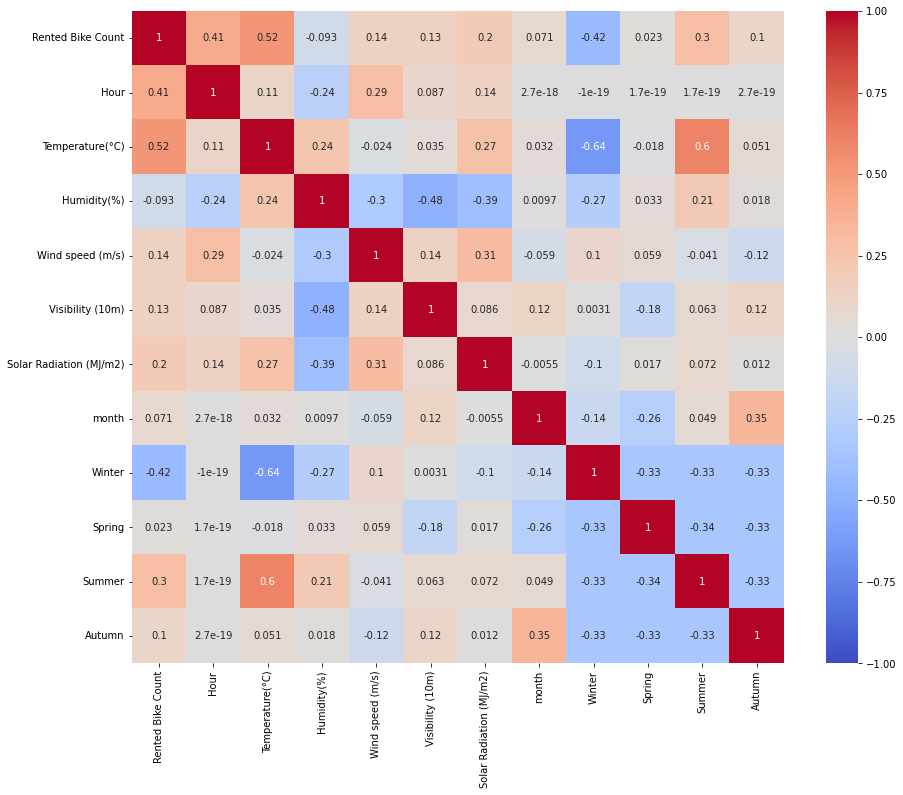

In [113]:
# extracting correlation heatmap

plt.figure(figsize=(15,12))
sns.heatmap(df.corr('pearson'),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

In [114]:
# function to calculate Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [115]:
# multicollinearity result

calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Date']]])

,variables,VIF
0,Hour,1.186328
1,Temperature(°C),2.871155
2,Humidity(%),2.137895
3,Wind speed (m/s),1.264894
4,Visibility (10m),1.503631
5,Solar Radiation (MJ/m2),1.591228
6,month,1.211705
7,Winter,16.509521
8,Spring,17.996409
9,Summer,22.666811


In [116]:
# dropping "summer" column as it adds to multicollinearity

df.drop(columns=['Summer'],axis=1,inplace=True)

In [117]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Date']]])

,variables,VIF
0,Hour,4.232652
1,Temperature(°C),6.982894
2,Humidity(%),10.146646
3,Wind speed (m/s),5.800116
4,Visibility (10m),7.565901
5,Solar Radiation (MJ/m2),2.203240
6,month,5.226156
7,Winter,3.829748
8,Spring,2.343245
9,Autumn,2.386321


In [118]:
# checking types of columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   float64
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   float64
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Holiday                  8760 non-null   object 
 8   Functioning Day          8760 non-null   object 
 9   month                    8760 non-null   int64  
 10  Winter                   8760 non-null   int64  
 11  Spring                   8760 non-null   int64  
 12  Autumn                   8760 non-null   int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 889.8+ KB


In [119]:
# converting object type columns to float

df['Functioning Day'] = df['Functioning Day'].astype(float)
df['Holiday'] = df['Holiday'].astype(float)

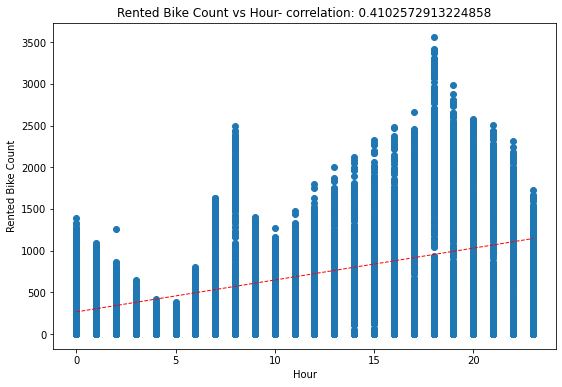

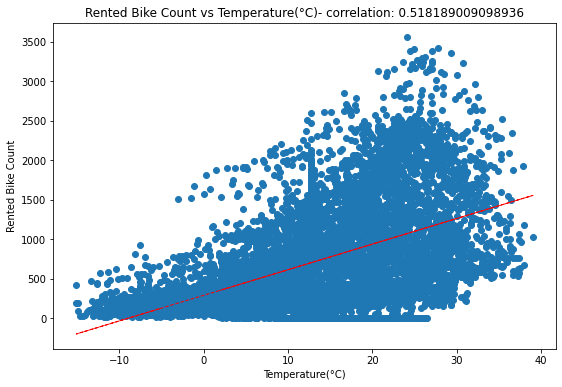

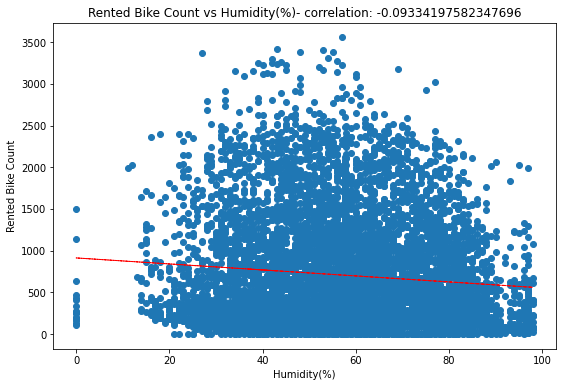

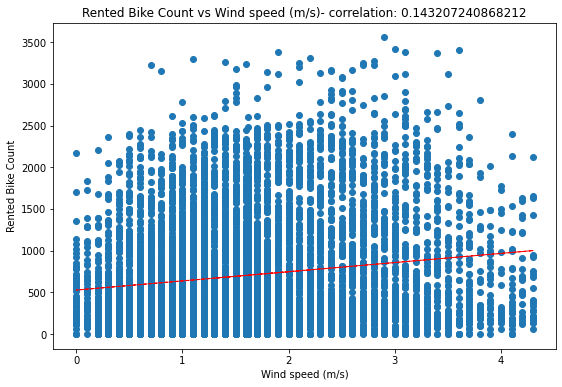

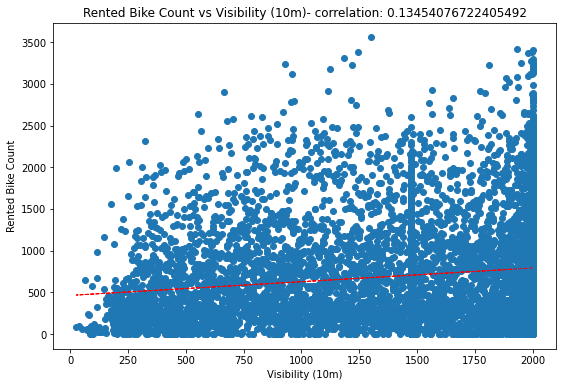

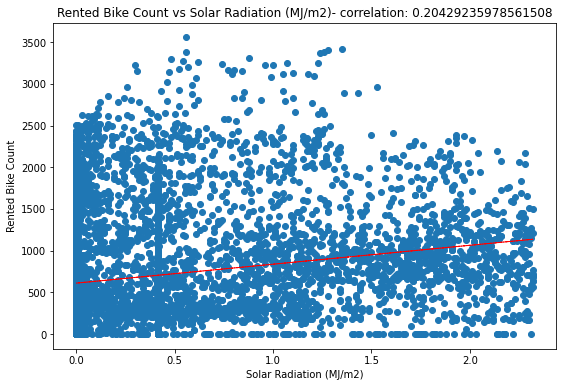

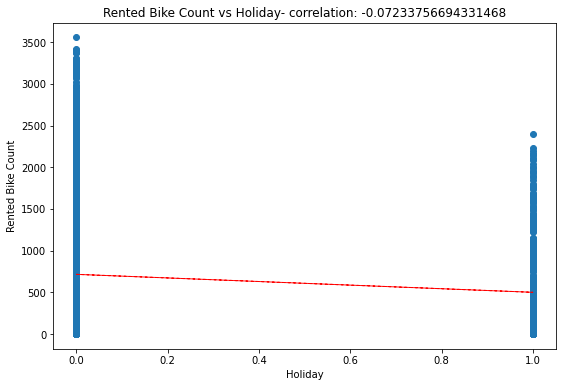

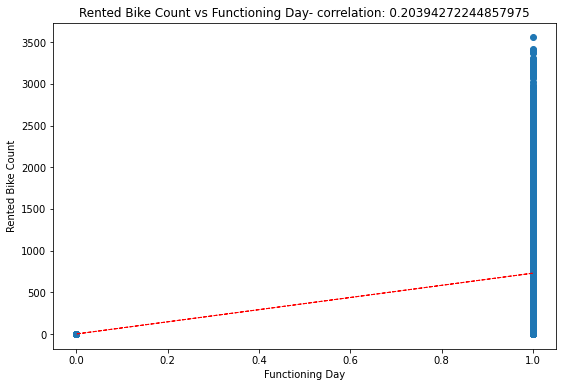

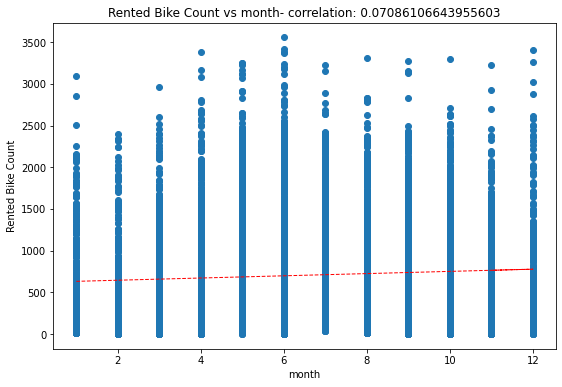

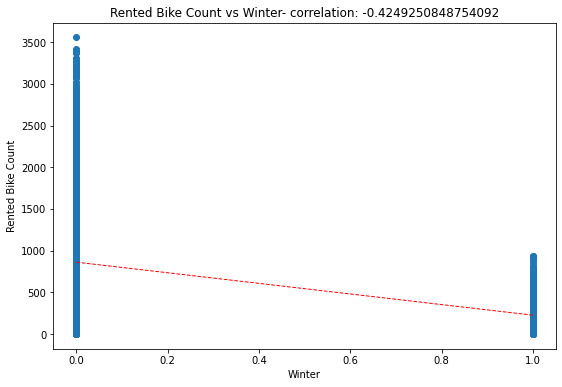

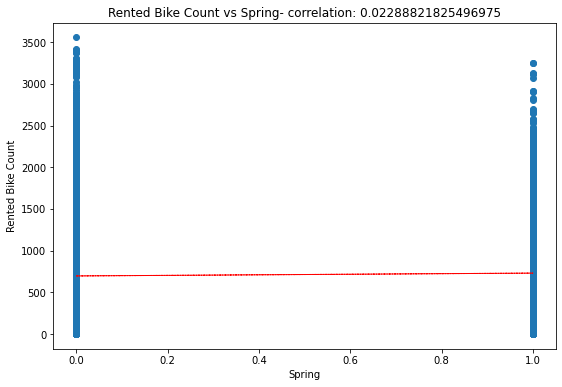

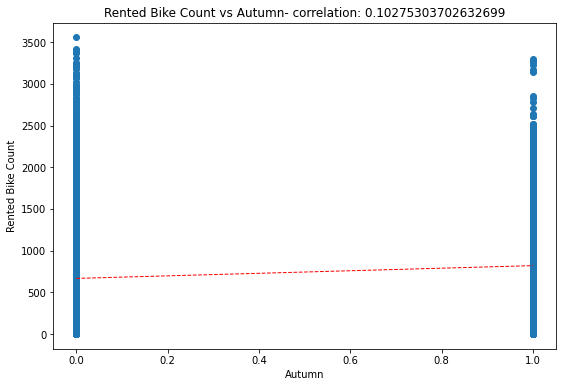

In [120]:
# obtaining correlation plots between dependent and independent variables

numeric_features = df.columns
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

#Models

In [121]:
# Creating the data of independent variables
Y = df['Rented Bike Count']

# Create the dependent variable data
X = df.drop(columns=['Rented Bike Count'],axis=1).values

In [122]:
X

array([[ 0. , -5.2, 37. , ...,  1. ,  0. ,  0. ],
       [ 1. , -5.5, 38. , ...,  1. ,  0. ,  0. ],
       [ 2. , -6. , 39. , ...,  1. ,  0. ,  0. ],
       ...,
       [21. ,  2.6, 39. , ...,  0. ,  0. ,  1. ],
       [22. ,  2.1, 41. , ...,  0. ,  0. ,  1. ],
       [23. ,  1.9, 43. , ...,  0. ,  0. ,  1. ]])

In [123]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [124]:
# Transforming data

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Linear regression model

In [125]:
# Fitting Multiple Linear Regression to the Training set

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
# Predicting the Train set results

Y_pred_train = regressor.predict(X_train)

In [127]:
# Predicting the Test set results

Y_pred_test = regressor.predict(X_test)

In [128]:
# r2 score of train set

r2_linear_train = r2_score(Y_train, Y_pred_train)

In [129]:
r2_linear_train

0.5090379835740498

In [130]:
r2_linear_test = r2_score(Y_test, Y_pred_test)

In [131]:
# different metrics used

MSE  = mean_squared_error(Y_test,Y_pred_test)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_linear_test = r2_score(Y_test,Y_pred_test)
print("R2 :" ,r2_linear_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 202937.66869256634
RMSE : 450.4860360683407
R2 : 0.5151094008043042
Adjusted R2 :  0.5117634047201476


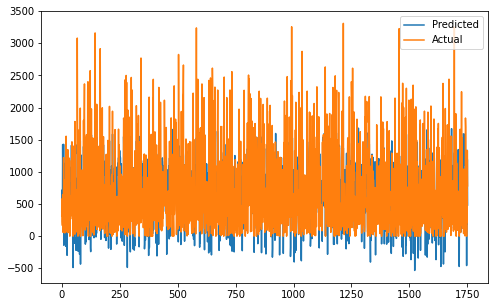

In [35]:
# plotting results from above model

plt.figure(figsize=(8,5))
plt.plot((Y_pred_test))
plt.plot(np.array((Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## Lasso regression model

In [36]:
### Cross validation ###

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [0.8,1,10,20,40,80,100,300,700,1000]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.8, 1, 10, 20, 40, 80, 100, 300, 700,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [37]:
# getting best parameters

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.8}

Using  {'alpha': 0.8}  the negative mean squared error is:  -205096.00188867265


In [38]:
Y_pred_lasso = lasso_regressor.predict(X_test)

In [39]:
# different metrics used

MSE  = mean_squared_error(Y_test,Y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_lasso_test = r2_score(Y_test,Y_pred_lasso)
print("R2 :" ,r2_lasso_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 203516.67879838907
RMSE : 451.1282287757984
R2 : 0.5137259387838644
Adjusted R2 :  0.5103703960957715


##Ridge regression model

In [40]:
# training model

from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1,0.001,10,20,35,60,70,100,800,1200]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 0.001, 10, 20, 35, 60, 70, 100, 800,
                                   1200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [41]:
# getting best parameters

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -204891.04307324544


In [42]:
Y_pred_ridge = ridge_regressor.predict(X_test)

In [47]:
# evaluating metrics

MSE  = mean_squared_error(Y_test,Y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_ridge_test = r2_score(Y_test,Y_pred_ridge)
print("R2 :" ,r2_ridge_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 203018.44476460663
RMSE : 450.5756815060114
R2 : 0.5149163979072835
Adjusted R2 :  0.5103703960957715


## Decision-tree regression model

In [48]:
# training model

from sklearn.tree import DecisionTreeRegressor
decisionTree = DecisionTreeRegressor()

param = {'max_depth' : [1,4,5,6,7,10,15,20,8]}

gridSearch_decisionTree=GridSearchCV(decisionTree,param,scoring='r2',cv=6)
gridSearch_decisionTree.fit(X_train,Y_train)


best_DecisionTree=gridSearch_decisionTree.best_estimator_
bestDecisionTree_testScore=best_DecisionTree.score(X_test,Y_test)
r2_decision_test = best_DecisionTree.score(X_test,Y_test)

In [49]:
# extracting best parameters

print(f"The best Decision Tree R2 score is {gridSearch_decisionTree.best_score_} with max depth {gridSearch_decisionTree.best_params_['max_depth']}")
print('\n')
print(f"The best R2 test score is : {bestDecisionTree_testScore} with max depth = {gridSearch_decisionTree.best_params_['max_depth']}")

The best Decision Tree R2 score is 0.7750744181299801 with max depth 10


The best R2 test score is : 0.795209194316514 with max depth = 10


##Random forest regression model

In [50]:
# training model

from sklearn.ensemble import RandomForestRegressor
randomForestAlgo = RandomForestRegressor()


param = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=20, num=5)], 
         'max_depth' : [10,15,20],
         'min_samples_split':[2,4],
         'min_samples_leaf':[1,2],
         'bootstrap' : [True,False]
        }

gridSearch_RandomForest=GridSearchCV(randomForestAlgo,param,scoring='r2',cv=5)
gridSearch_RandomForest.fit(X_train,Y_train)

best_randomForest=gridSearch_RandomForest.best_estimator_
bestRandomForest_testScore=best_randomForest.score(X_test,Y_test)
r2_randomforest_test = best_randomForest.score(X_test,Y_test)

In [51]:
# getting best parameters

print(f"The best Random Forest R2 train score is : {gridSearch_RandomForest.best_score_} with n estimators = {gridSearch_RandomForest.best_params_['n_estimators']}, max depth : {gridSearch_RandomForest.best_params_['max_depth']}, min samples split : {gridSearch_RandomForest.best_params_['min_samples_split']} and min samples leaf : {gridSearch_RandomForest.best_params_['min_samples_leaf']}")
print('\n')
print(f"The best Random Forest R2 test score is : {bestRandomForest_testScore} with n estimators = {gridSearch_RandomForest.best_params_['n_estimators']}, max depth : {gridSearch_RandomForest.best_params_['max_depth']}, min samples split : {gridSearch_RandomForest.best_params_['min_samples_split']} and min samples leaf : {gridSearch_RandomForest.best_params_['min_samples_leaf']}")

The best Random Forest R2 train score is : 0.8274797361228406 with n estimators = 17, max depth : 15, min samples split : 4 and min samples leaf : 1


The best Random Forest R2 test score is : 0.8443407002096136 with n estimators = 17, max depth : 15, min samples split : 4 and min samples leaf : 1


##Extra-trees regression model

In [52]:
# training model

from sklearn.ensemble import ExtraTreesRegressor
extraTreesAlgo = ExtraTreesRegressor()

param = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=20, num=5)], 
         'max_depth' : [50,80,100],
         'min_samples_split':[1,4,8],
         'min_samples_leaf':[1,2,3],
         'bootstrap' : [True,False]
        }

gridSearch_ExtraTrees=GridSearchCV(extraTreesAlgo,param,scoring='r2',cv=5)
gridSearch_ExtraTrees.fit(X_train,Y_train)

best_ExtrasTrees=gridSearch_ExtraTrees.best_estimator_
bestExtrasTrees_testScore=best_ExtrasTrees.score(X_test,Y_test)
r2_extratree_test = best_ExtrasTrees.score(X_test,Y_test)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

In [53]:
# getting best parameters

print(f"The best Random Forest R2 score is : {gridSearch_ExtraTrees.best_score_} with n estimators = {gridSearch_ExtraTrees.best_params_['n_estimators']}, max depth : {gridSearch_ExtraTrees.best_params_['max_depth']}, min samples split : {gridSearch_ExtraTrees.best_params_['min_samples_split']} and min samples leaf : {gridSearch_ExtraTrees.best_params_['min_samples_leaf']}")
print('\n')
print(f"The best Random Forest R2 test score is : {bestExtrasTrees_testScore} with n estimators = {gridSearch_ExtraTrees.best_params_['n_estimators']}, max depth : {gridSearch_ExtraTrees.best_params_['max_depth']}, min samples split : {gridSearch_ExtraTrees.best_params_['min_samples_split']} and min samples leaf : {gridSearch_ExtraTrees.best_params_['min_samples_leaf']}")

The best Random Forest R2 score is : 0.8292883165521376 with n estimators = 20, max depth : 100, min samples split : 8 and min samples leaf : 3


The best Random Forest R2 test score is : 0.852684885494403 with n estimators = 20, max depth : 100, min samples split : 8 and min samples leaf : 3


##Elasticnet regularization model

In [54]:
# training model

from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(X_train,Y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [55]:
elasticnet.score(X_train, Y_train)

0.43155863300576247

In [56]:
Y_pred_en = elasticnet.predict(X_test)

In [57]:
# evaluating metrics

MSE  = mean_squared_error(Y_test, Y_pred_en)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_elasticnet_test = r2_score(Y_test,Y_pred_en)
print("R2 :" ,r2_elasticnet_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test, Y_pred_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 241812.9076566562
RMSE : 491.7447586468576
R2 : 0.4222225649762552
Adjusted R2 :  0.4182356016523421


##Crossvalidation on elasticnet model

In [58]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regularization = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regularization.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 559301398.2878586, tolerance: 235936.34232857652
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 539513695.1827705, tolerance: 229899.74464018922
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 562602323.3415792, tolerance: 237533.46723869073
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 549709368

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [59]:
print("The best fit alpha value is found out to be :" ,elastic_regularization.best_params_)
print("\nUsing ",elastic_regularization.best_params_, " the negative mean squared error is: ", elastic_regularization.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.3}

Using  {'alpha': 0.0001, 'l1_ratio': 0.3}  the negative mean squared error is:  -204884.98982603196


In [60]:
Y_pred_elastic = elastic_regularization.predict(X_test)

In [61]:
MSE  = mean_squared_error(Y_test, Y_pred_elastic)
print("MSE :" , MSE)
  
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_elastic_cv_test = r2_score(Y_test, Y_pred_elastic)
print("R2 :" ,r2_elastic_cv_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 202976.5383352148
RMSE : 450.529175897871
R2 : 0.5150165273400737
Adjusted R2 :  0.5116698903809482


#Result

In [62]:
# creating a list of all model names

model_list = ['Linear regression','Lasso regression','Ridge regression','Decision Tree Regressor','Random Forest Regressor','Extra Trees Regressor','Elasticnet regularization','Elasticnet(cv) regressor']

In [63]:
# creating a list of all model r2 score results from above

result_list = [r2_linear_test,r2_lasso_test,r2_ridge_test,r2_decision_test,r2_randomforest_test,r2_extratree_test,r2_elasticnet_test,r2_elastic_cv_test]

In [64]:
# creating an empty dataframe

results_df = pd.DataFrame()

In [65]:
# adding above lists to the empty dataframe

results_df['model name'] = model_list
results_df['R2-score'] = result_list

In [66]:
# dataframe containing results from all the above models used

results_df

,model name,R2-score
0,Linear regression,0.515109
1,Lasso regression,0.513726
2,Ridge regression,0.514916
3,Decision Tree Regressor,0.795209
4,Random Forest Regressor,0.844341
5,Extra Trees Regressor,0.852685
6,Elasticnet regularization,0.422223
7,Elasticnet(cv) regressor,0.515017


#Conclusion

1. From above its clear that extratrees regression model is the best model for this dataset.
2. Elasticnet regularization performed very poorly.
3. Preprocessing the data was one of the difficult challenges we faced.
4. We were able to get relevant information from the dataset using exploratory data analysis.